<a href="https://colab.research.google.com/github/anjithababuraj/Projects/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

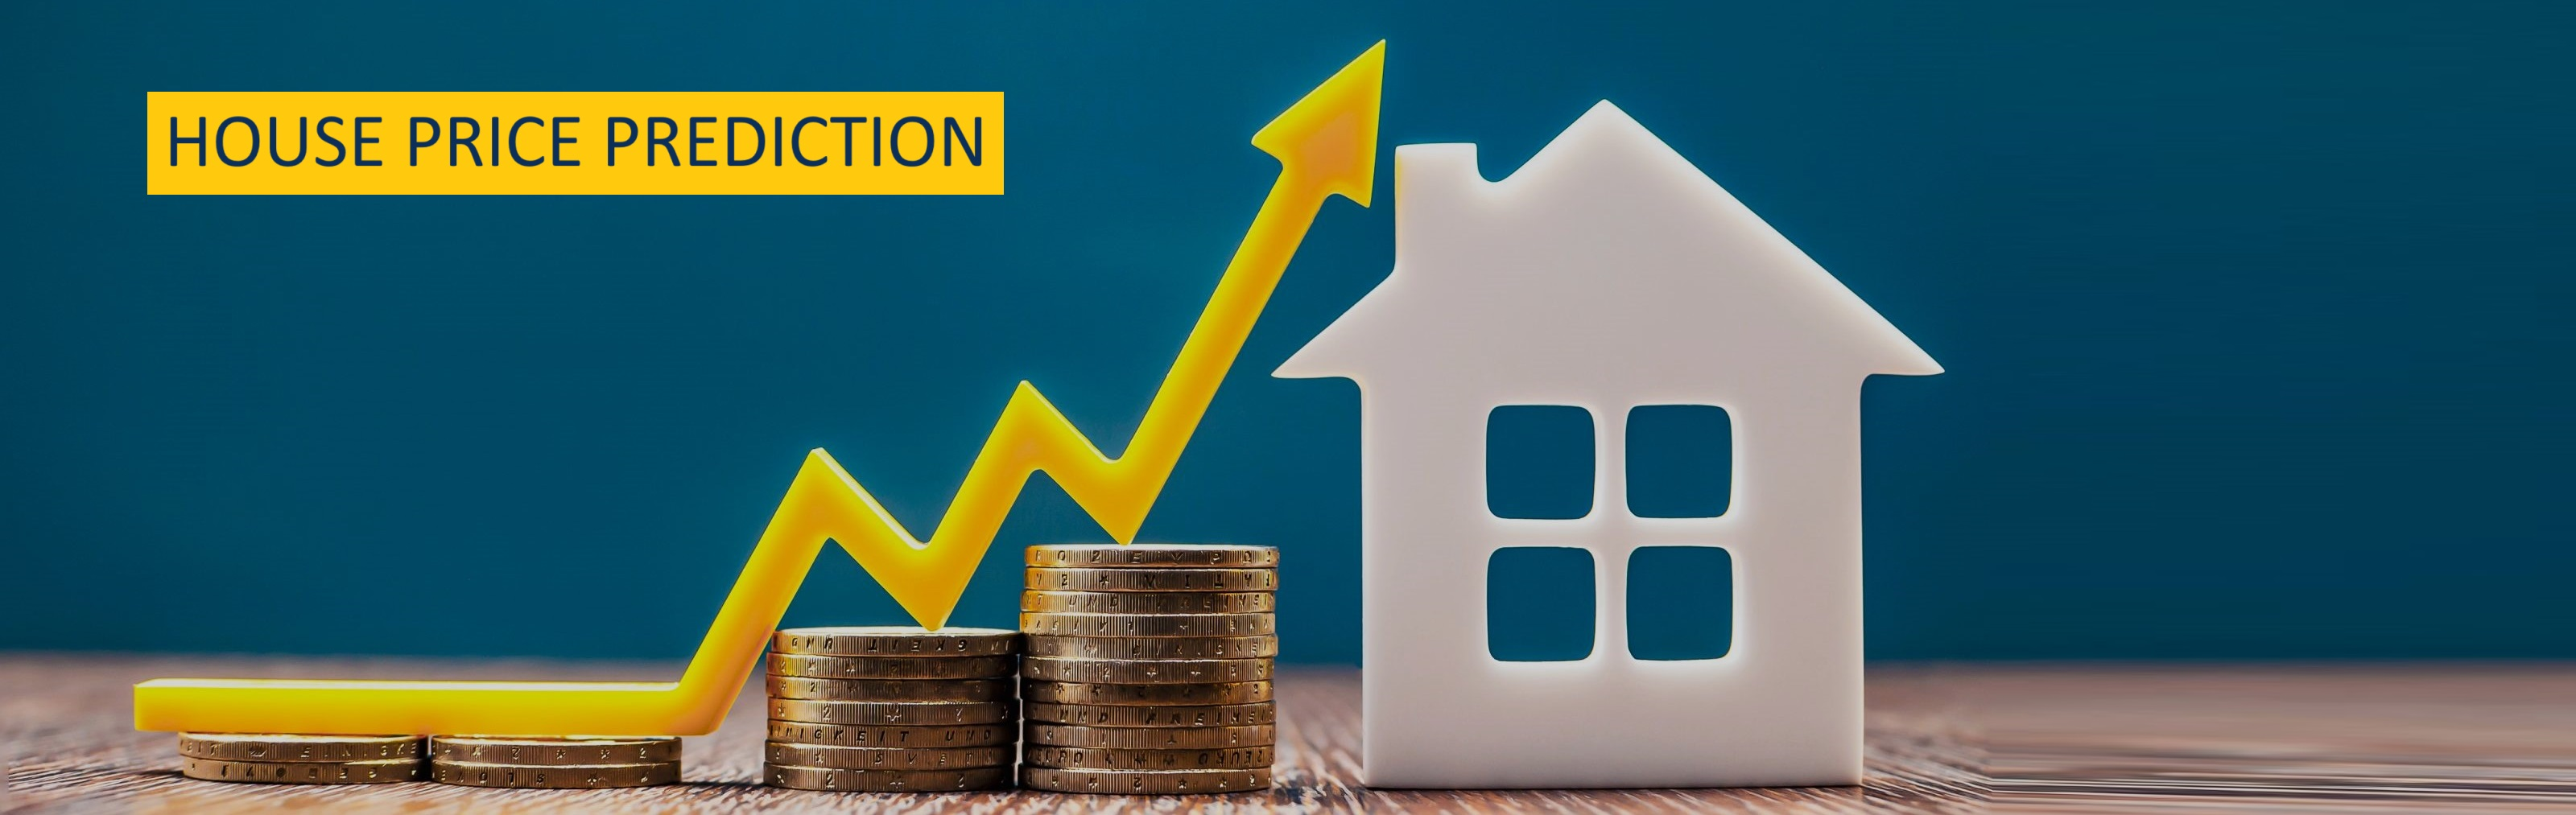

IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

LOADING DATASET

In [ ]:
df=pd.read_csv('/content/data[1].csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


DATA INFORMATIONS

In [ ]:
df.shape

(4600, 18)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

GENERAL STATISTICAL ANALYSIS

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [ ]:
df.corr()

<ipython-input-255-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


<ipython-input-256-d6f7bf51651d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='crest')


<Axes: >

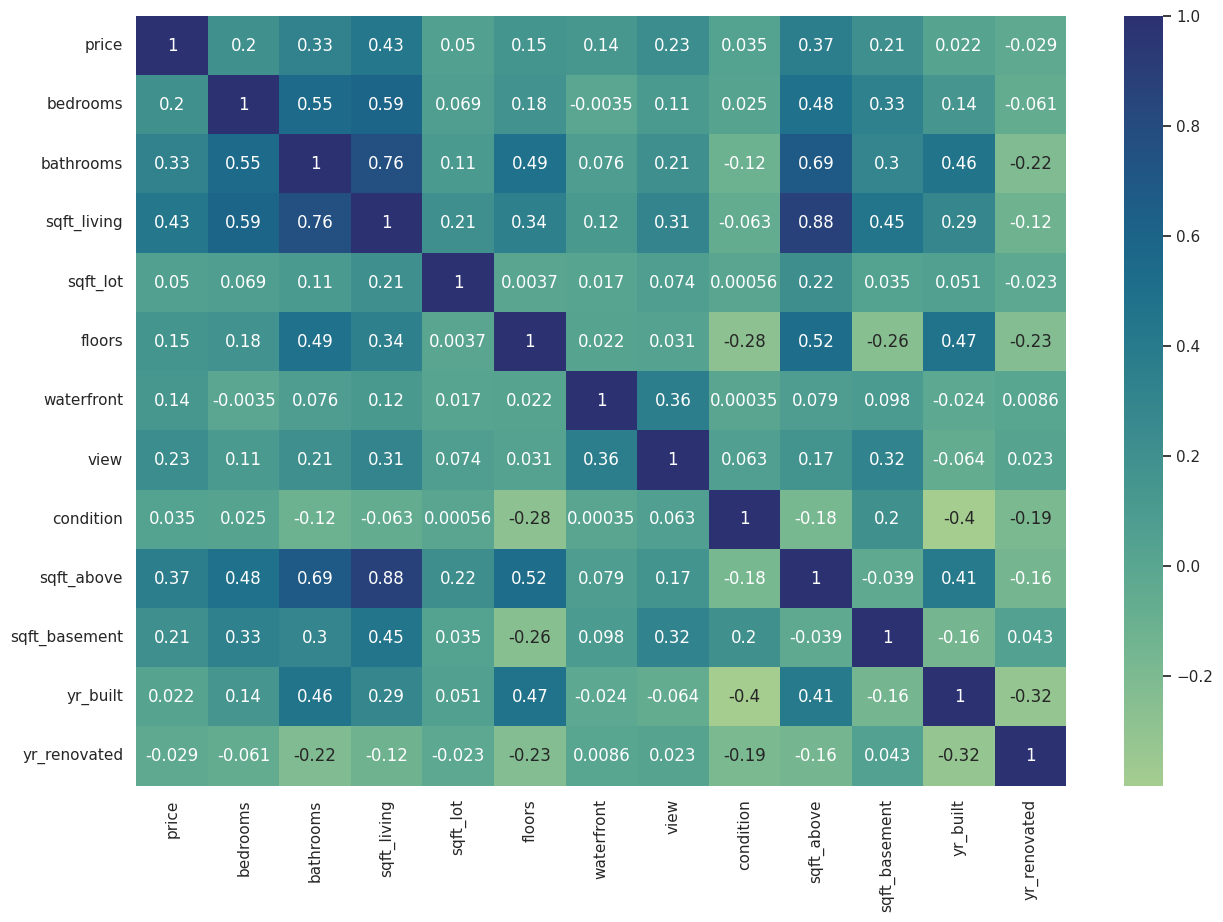

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='crest')

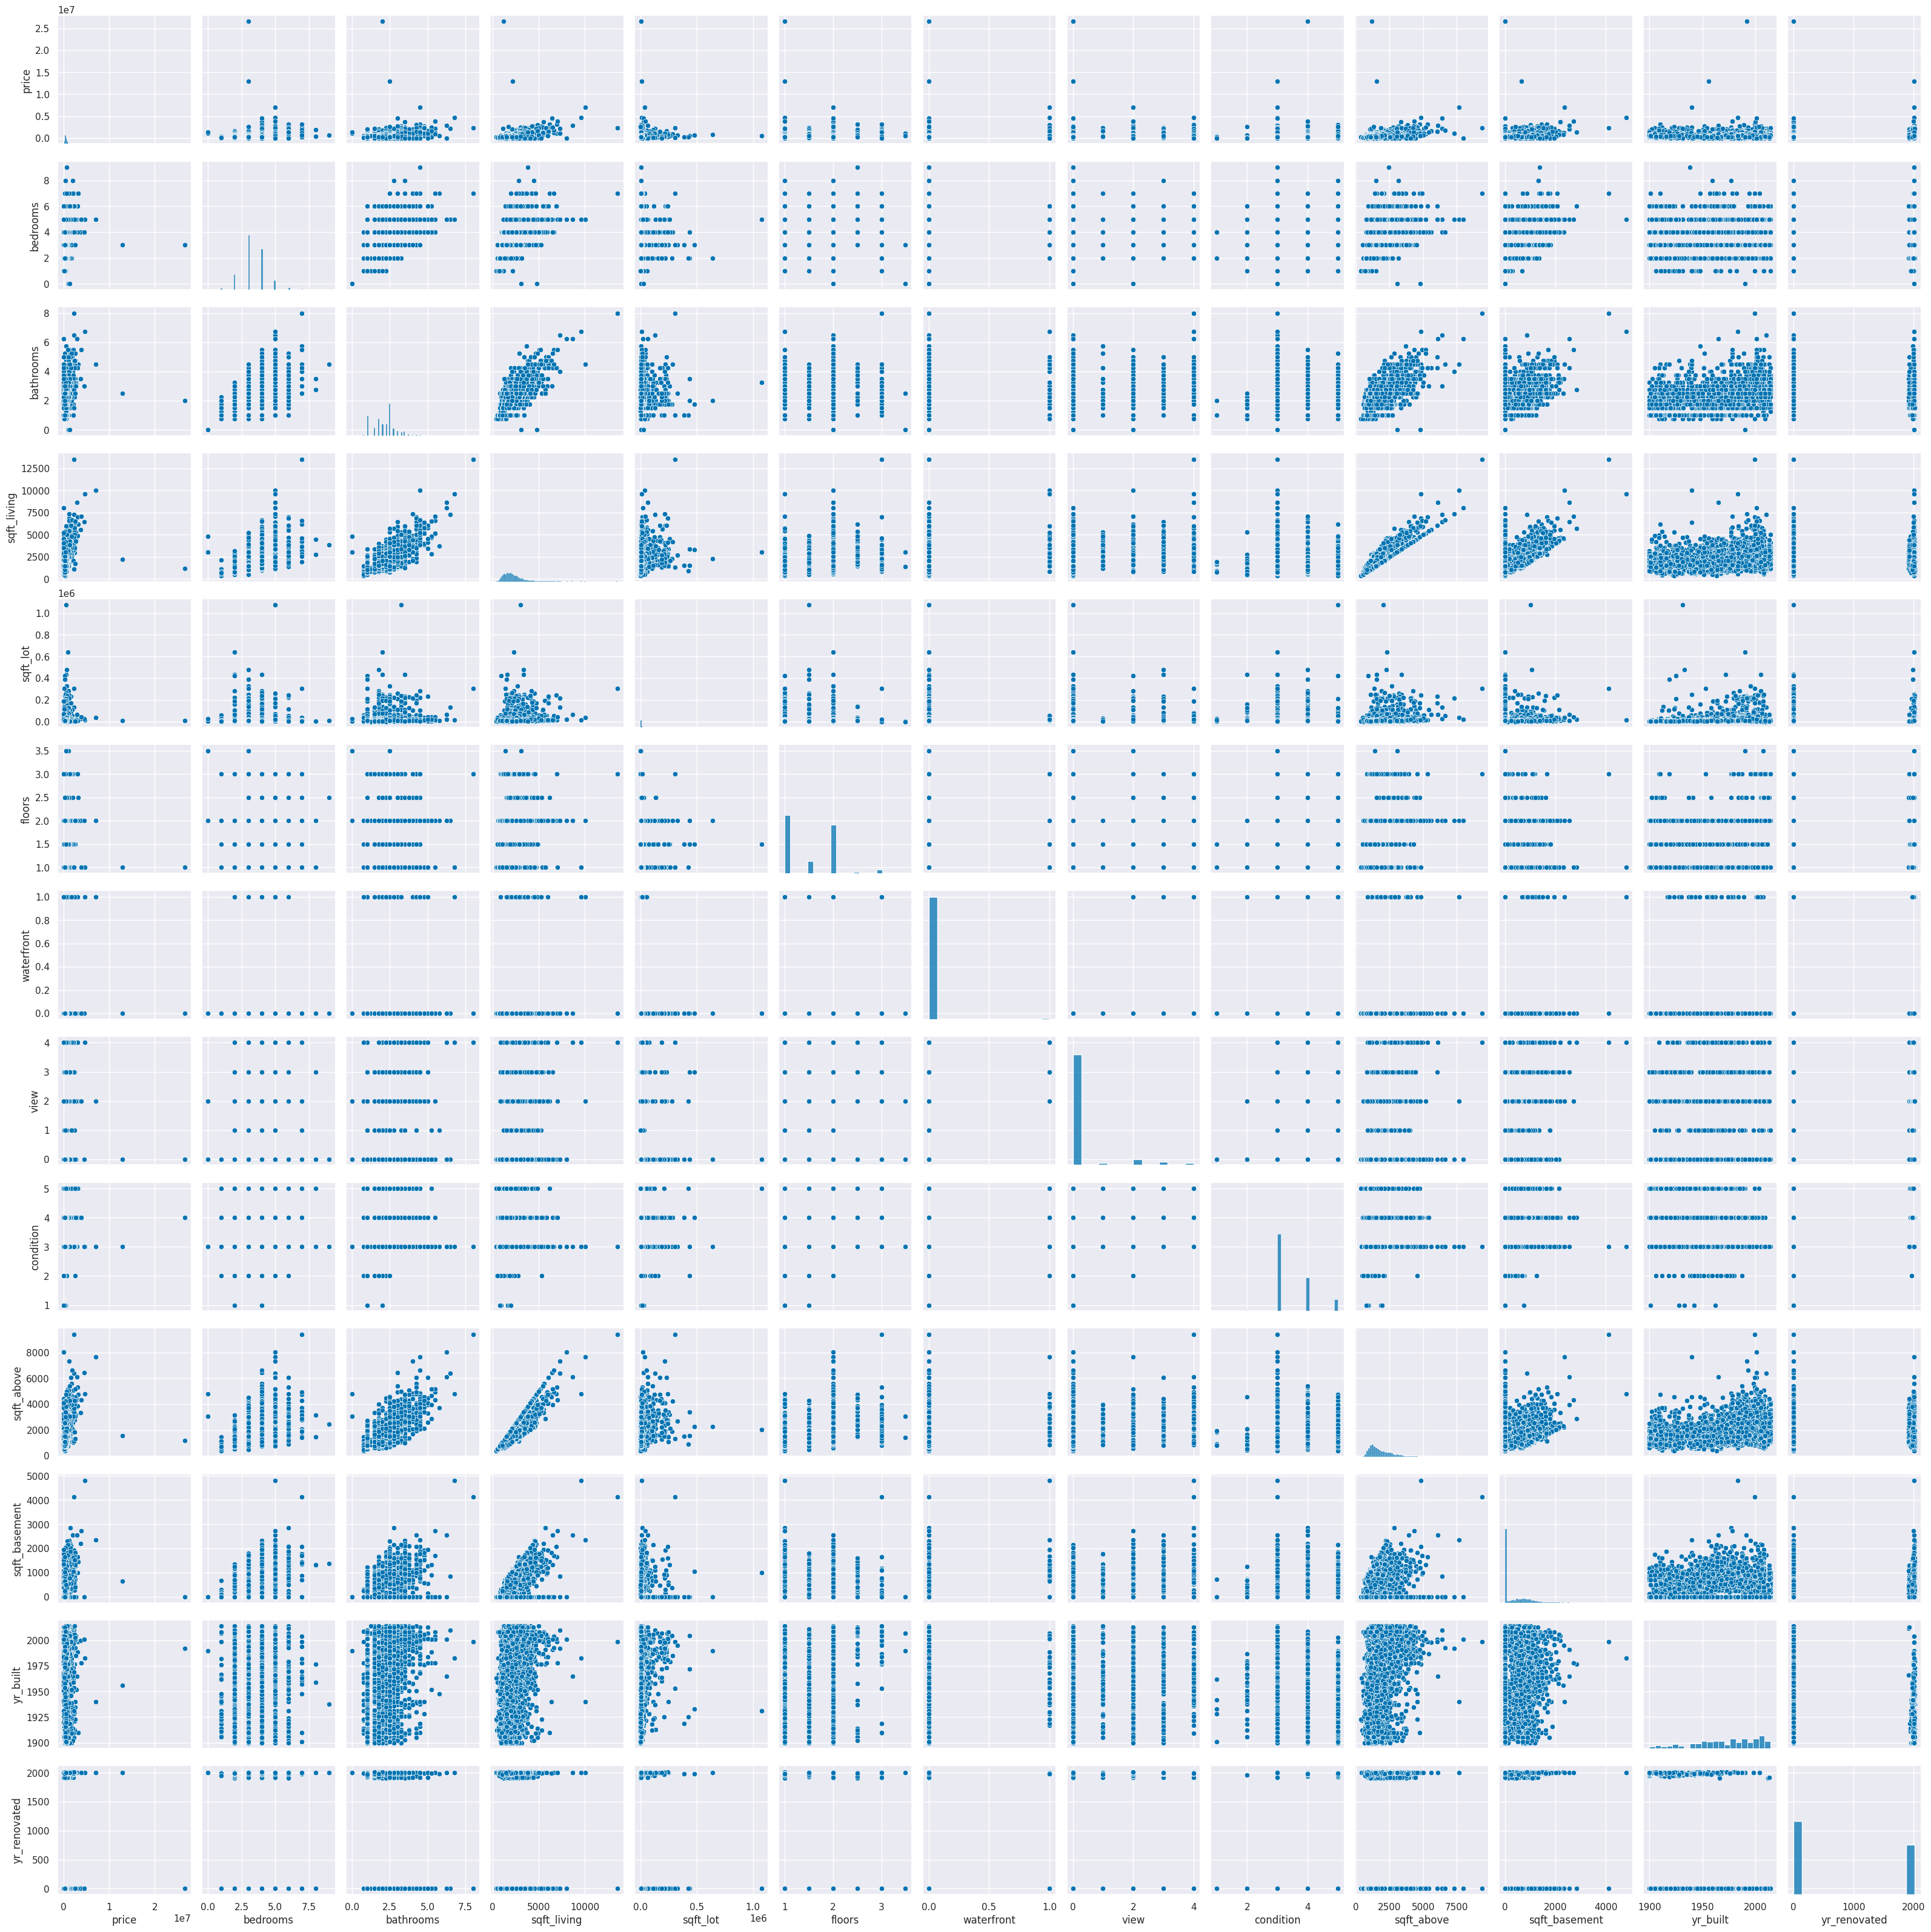

In [ ]:
sns.pairplot(df)

1.date

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
yr=df['date'].dt.year
yr.value_counts()

2014    4600
Name: date, dtype: int64

In [ ]:
mn=df['date'].dt.month
mn.value_counts()

6    2179
5    1768
7     653
Name: date, dtype: int64

<ipython-input-261-8bc1fbcece55>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=mn.values,y='price',data=df,palette="pastel").set_ylim()


(-1329500.0, 27919500.0)

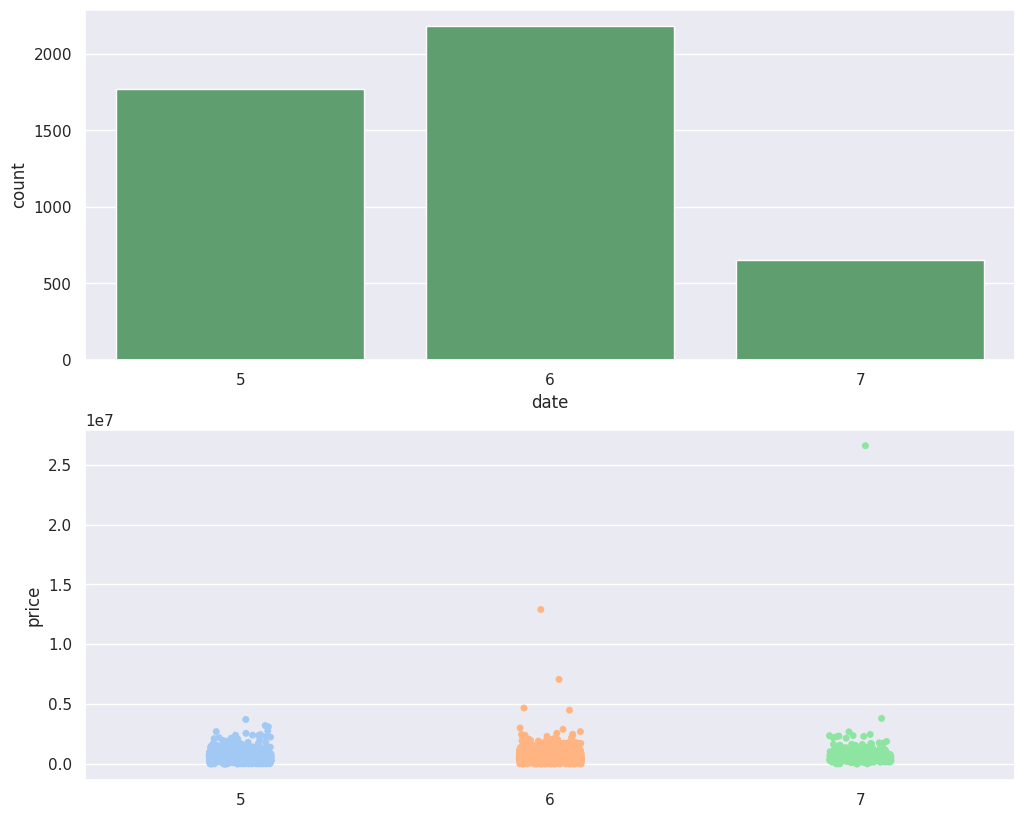

In [ ]:
from matplotlib.gridspec import GridSpec
from matplotlib import style
sns.set()
sns.set_palette("colorblind")

fig=plt.figure(figsize=(12,10))
grid=GridSpec(nrows=2,ncols=1,figure=fig)

fig1=fig.add_subplot(grid[0,:])
sns.countplot(x=mn,data=df,ax=fig1,color='g')

fig2=fig.add_subplot(grid[1,:])
sns.stripplot(x=mn.values,y='price',data=df,palette="pastel").set_ylim()

In [ ]:
dy=df['date'].dt.day
dy.value_counts()

9     297
2     235
23    227
20    223
8     218
27    196
19    184
5     183
3     182
7     180
16    170
12    170
13    165
6     153
30    141
26    139
25    136
10    134
24    131
28    124
1     123
17    114
4     107
18    106
22    102
21    102
11     92
15     89
14     89
29     82
31      6
Name: date, dtype: int64

<ipython-input-263-9b09610111e6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=dy.values,y='price',data=df,palette="pastel").set_ylim()


(-1329500.0, 27919500.0)

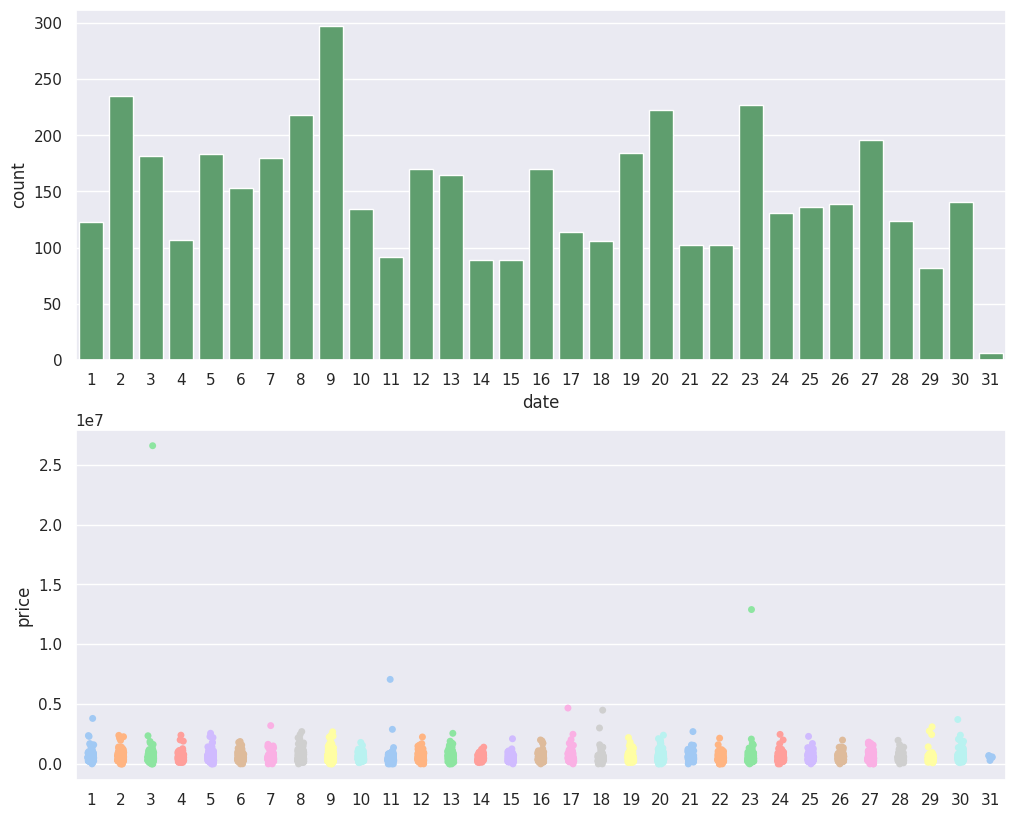

In [ ]:
fig=plt.figure(figsize=(12,10))
grid=GridSpec(nrows=2,ncols=1,figure=fig)

fig1=fig.add_subplot(grid[0,:])
sns.countplot(x=dy,data=df,ax=fig1,color='g')

fig2=fig.add_subplot(grid[1,:])
sns.stripplot(x=dy.values,y='price',data=df,palette="pastel").set_ylim()

2.price

<Axes: ylabel='price'>

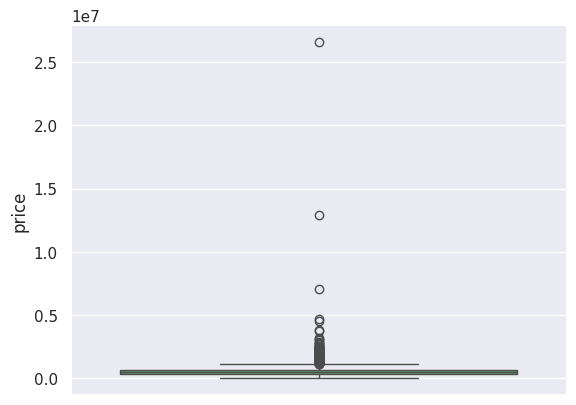

In [ ]:
sns.boxplot(df['price'],color='g')

In [ ]:
def outlier_det(df,i):
  Q1=np.percentile(df[i],25)
  Q3=np.percentile(df[i],75)
  lower=Q1-(1.5*(Q3-Q1))
  upper=Q3+(1.5*(Q3-Q1))
  df=df[(lower<df[i]) & (df[i]<upper)]
  return df

In [ ]:
df=outlier_det(df,'price')

<Axes: xlabel='price', ylabel='Count'>

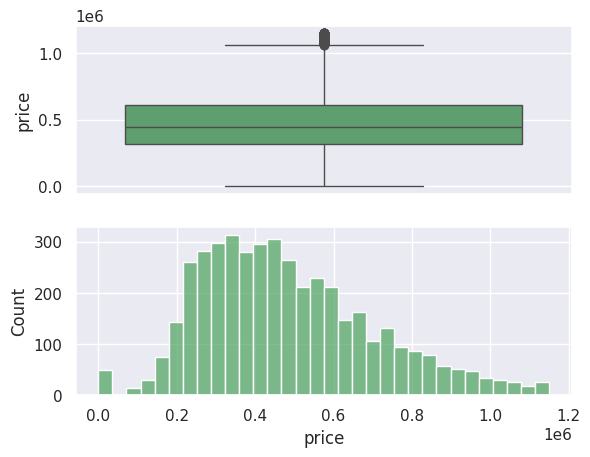

In [ ]:
plt.subplot(2,1,1)
sns.boxplot(df['price'],color='g')

plt.subplot(2,1,2)
sns.histplot(df['price'],color='g')

In [ ]:
df.shape

(4360, 18)

3.bedrooms

In [ ]:
df['bedrooms'].value_counts()

3.0    1988
4.0    1413
2.0     562
5.0     297
6.0      49
1.0      38
7.0      10
9.0       1
0.0       1
8.0       1
Name: bedrooms, dtype: int64

<Axes: ylabel='bedrooms'>

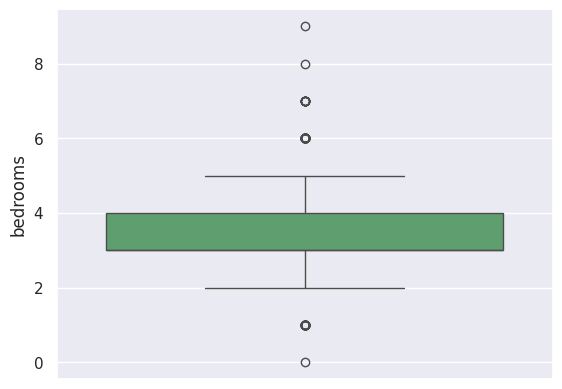

In [ ]:
sns.boxplot(df['bedrooms'],color='g')

In [ ]:
df=outlier_det(df,'bedrooms')

<Axes: xlabel='bedrooms', ylabel='Count'>

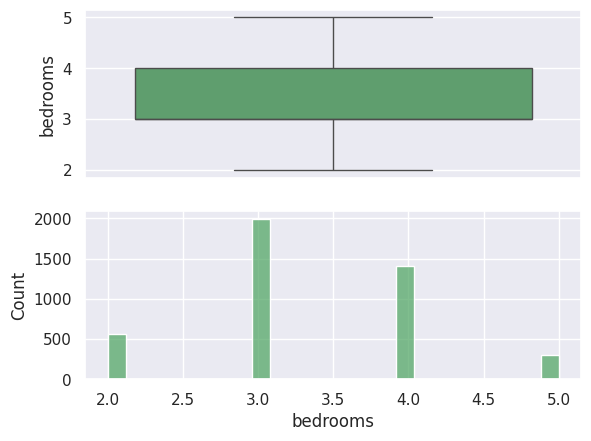

In [ ]:
plt.subplot(2,1,1)
sns.boxplot(df['bedrooms'],color='g')

plt.subplot(2,1,2)
sns.histplot(df['bedrooms'],color='g')

In [ ]:
df.shape

(4260, 18)

4.bathrooms

In [ ]:
df['bathrooms'].value_counts()

2.50    1143
1.00     718
1.75     615
2.00     416
2.25     398
1.50     283
2.75     252
3.00     138
3.50     118
3.25     102
3.75      25
4.00      14
4.50      11
4.25       9
0.75       9
5.00       3
1.25       2
4.75       2
5.50       1
6.25       1
Name: bathrooms, dtype: int64

<ipython-input-275-6da0b2828d88>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=df['bathrooms'],y='price',data=df,palette="pastel",height=5,aspect=2)


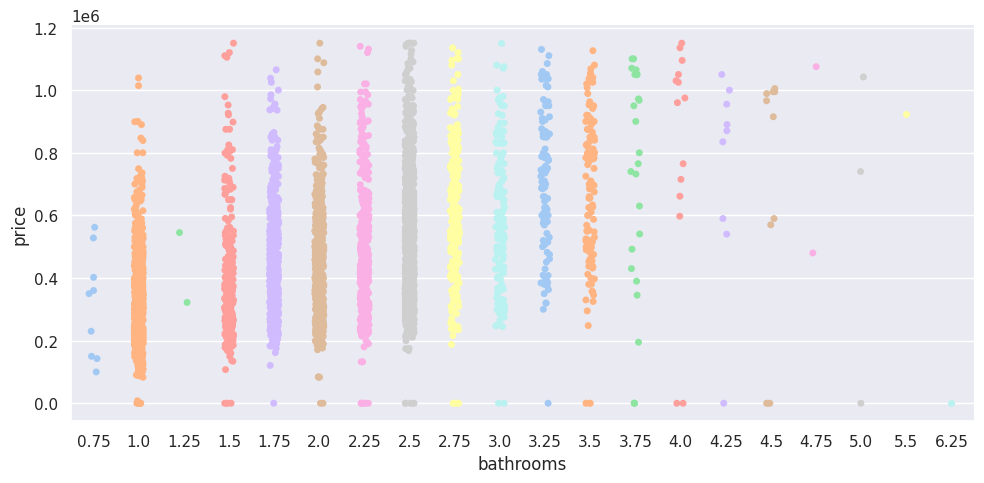

In [ ]:
sns.catplot(x=df['bathrooms'],y='price',data=df,palette="pastel",height=5,aspect=2)

In [ ]:
df=outlier_det(df,'bathrooms')

<ipython-input-277-6da0b2828d88>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=df['bathrooms'],y='price',data=df,palette="pastel",height=5,aspect=2)


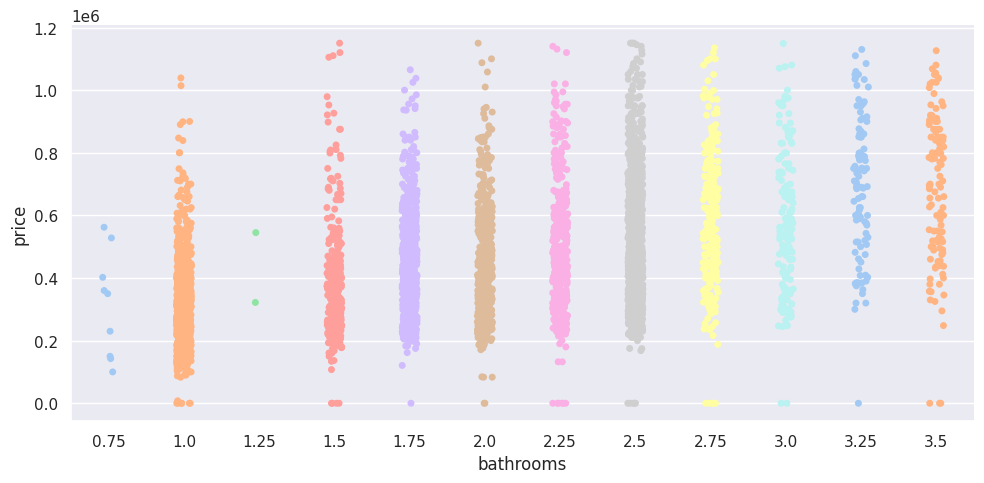

In [ ]:
sns.catplot(x=df['bathrooms'],y='price',data=df,palette="pastel",height=5,aspect=2)

In [ ]:
df['bathrooms']=df['bathrooms'].apply(lambda x:1 if x==0.75 or x==1.25 else x)

<Axes: xlabel='bathrooms', ylabel='Count'>

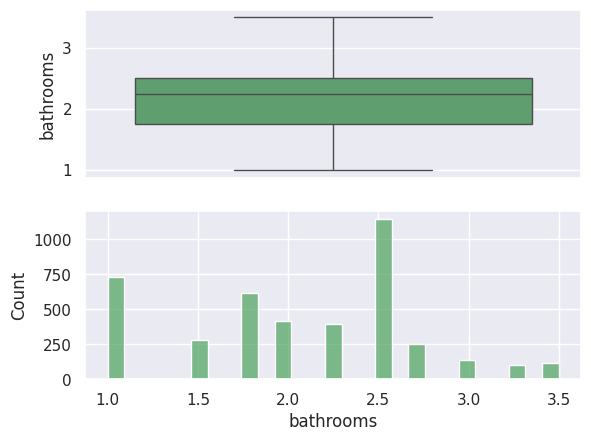

In [ ]:
plt.subplot(2,1,1)
sns.boxplot(df['bathrooms'],color='g')

plt.subplot(2,1,2)
sns.histplot(df['bathrooms'],color='g')

In [ ]:
df.shape

(4194, 18)

5.sqft_living

In [ ]:
df['sqft_living'].value_counts()

1720    32
1660    31
1840    30
2000    30
1940    30
        ..
1405     1
3900     1
1811     1
730      1
2538     1
Name: sqft_living, Length: 471, dtype: int64

<Axes: xlabel='sqft_living', ylabel='Count'>

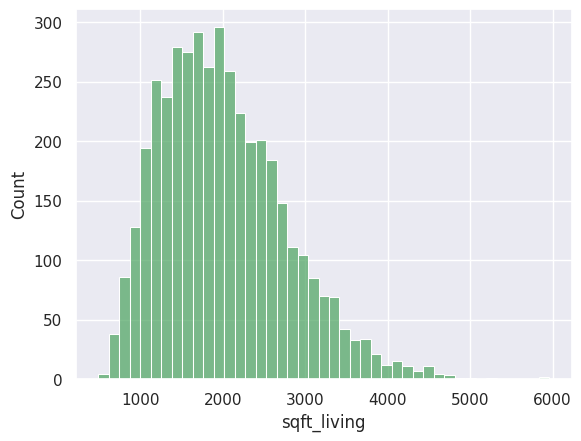

In [ ]:
sns.histplot(x=df['sqft_living'],color='g')

6.sqft_lot

In [ ]:
df['sqft_lot'].value_counts()

5000     74
6000     59
4000     48
7200     45
9600     25
         ..
23265     1
1546      1
3690      1
92347     1
8102      1
Name: sqft_lot, Length: 2868, dtype: int64

<Axes: xlabel='sqft_lot', ylabel='Count'>

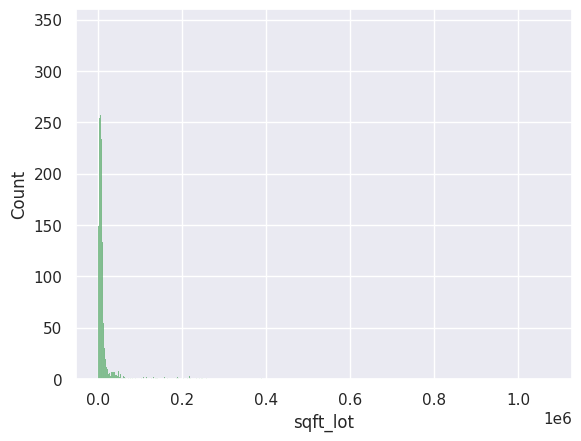

In [ ]:
sns.histplot(x=df['sqft_lot'],color='g')

7.floors

In [ ]:
df['floors'].value_counts()

1.0    2059
2.0    1585
1.5     409
3.0     119
2.5      21
3.5       1
Name: floors, dtype: int64

In [ ]:
df['floors']=df['floors'].apply(lambda x:2 if x==1.5 else 3 if x==2.5 or x==3.5 else x)

<ipython-input-287-3f3286d5177d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=df['floors'],y='price',data=df,palette="pastel",height=5,aspect=2)


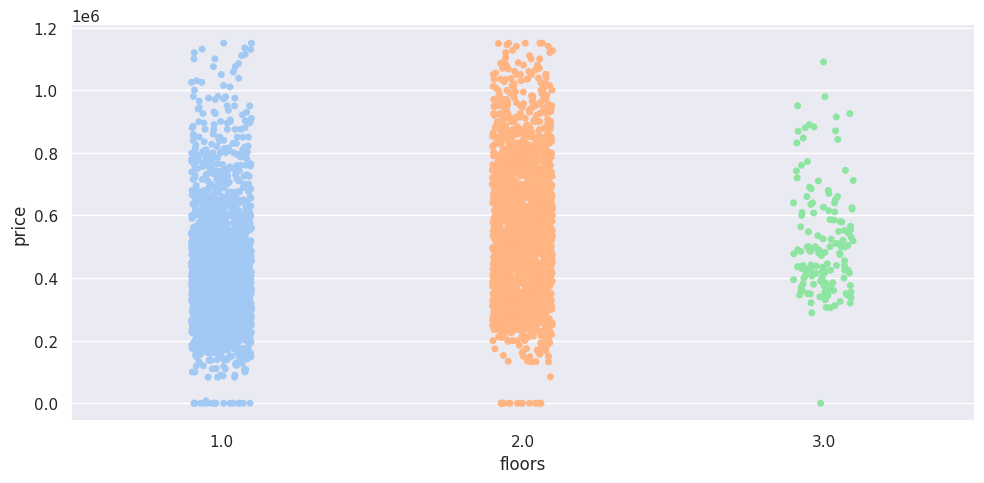

In [ ]:
sns.catplot(x=df['floors'],y='price',data=df,palette="pastel",height=5,aspect=2)

8.waterfront

0    4179
1      15
Name: waterfront, dtype: int64


<Axes: ylabel='waterfront'>

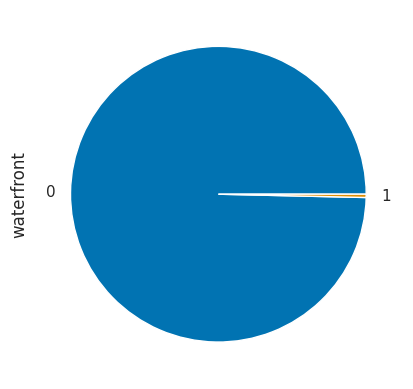

In [ ]:
print(df['waterfront'].value_counts())
df['waterfront'].value_counts().plot(kind='pie')

9.view

0    3884
2     158
3      67
1      54
4      31
Name: view, dtype: int64


<Axes: ylabel='view'>

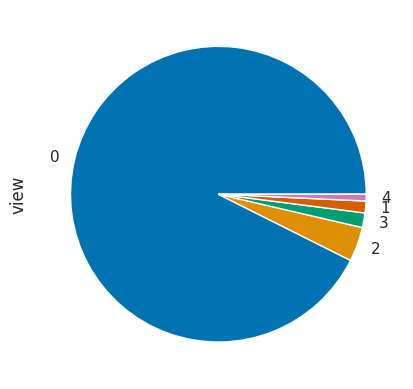

In [ ]:
print(df['view'].value_counts())
df['view'].value_counts().plot(kind='pie')

10.condition

In [ ]:
df['condition'].value_counts()

3    2619
4    1165
5     378
2      26
1       6
Name: condition, dtype: int64

<ipython-input-291-d61a8261f25d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=df['condition'],y='price',data=df,palette="pastel",height=5,aspect=2)


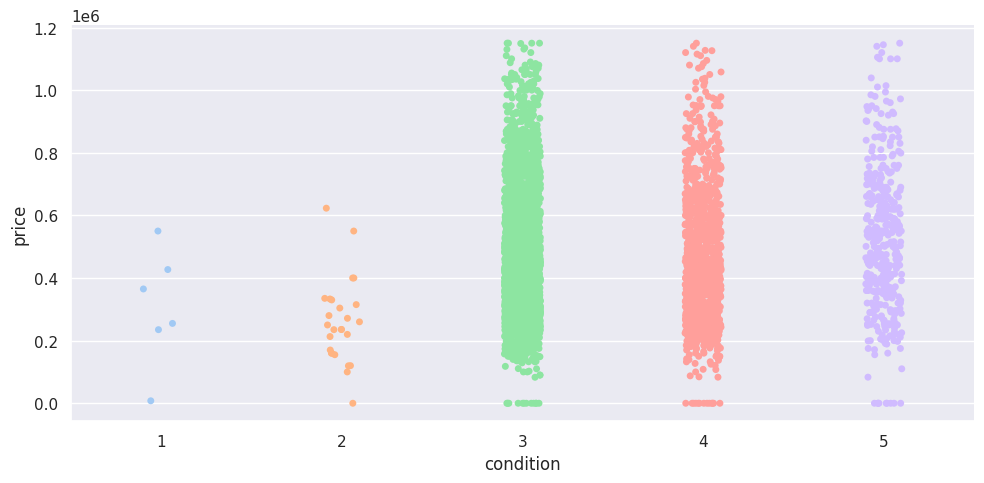

In [ ]:
sns.catplot(x=df['condition'],y='price',data=df,palette="pastel",height=5,aspect=2)

In [ ]:
df=df[df['condition']>1]

<Axes: xlabel='condition', ylabel='Count'>

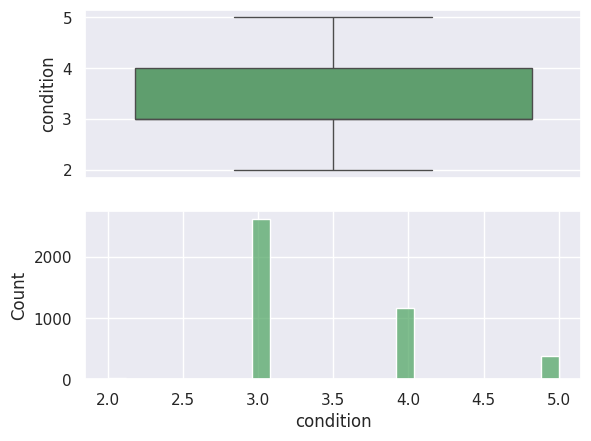

In [ ]:
plt.subplot(2,1,1)
sns.boxplot(df['condition'],color='g')

plt.subplot(2,1,2)
sns.histplot(df['condition'],color='g')

In [ ]:
df.shape

(4188, 18)

11.sqft_above

In [ ]:
# since sqft_living highly correlated with sqft_above, can drop one of them

12.sqft_basement

In [ ]:
df['sqft_basement'].value_counts()

0       2578
500       51
600       43
800       40
900       33
        ... 
1860       1
1910       1
1530       1
2300       1
1640       1
Name: sqft_basement, Length: 178, dtype: int64

<Axes: xlabel='sqft_basement', ylabel='Count'>

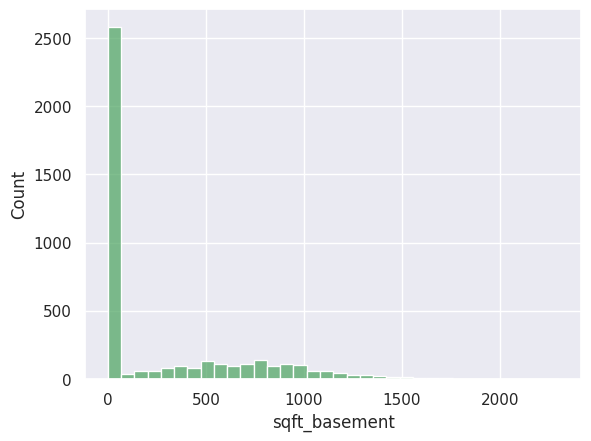

In [ ]:
sns.histplot(x=df['sqft_basement'],color='g')

13.yr_built

In [ ]:
df['yr_built'].value_counts()

2006    100
2005     95
2007     84
1978     82
2003     82
       ... 
1913      5
1935      5
1933      4
1934      3
1936      2
Name: yr_built, Length: 115, dtype: int64

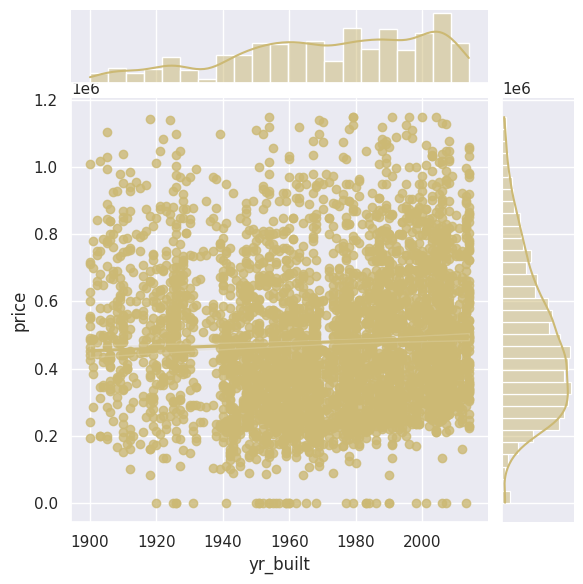

In [ ]:
sns.jointplot(x='yr_built',y='price',data=df,kind='reg',color='y')

14.yr_renovated

In [ ]:
df['yr_renovated'].value_counts()

0       2490
2000     162
2003     130
2001     105
2009      99
2005      87
2004      71
2014      65
2006      64
2013      59
1994      51
2011      50
1989      48
1923      48
2012      45
2008      40
1988      40
1983      38
1998      37
2002      36
1993      35
1999      35
1912      31
1992      30
1997      28
1979      28
2010      27
1985      25
1982      22
1996      18
1972      16
1956      13
1963      12
1990      12
1968       9
1969       9
1970       9
1984       8
1954       7
1974       6
1934       6
2007       5
1958       5
1971       5
1945       4
1986       3
1978       3
1980       2
1955       2
1977       1
1913       1
1995       1
1966       1
1960       1
1953       1
1981       1
1975       1
Name: yr_renovated, dtype: int64

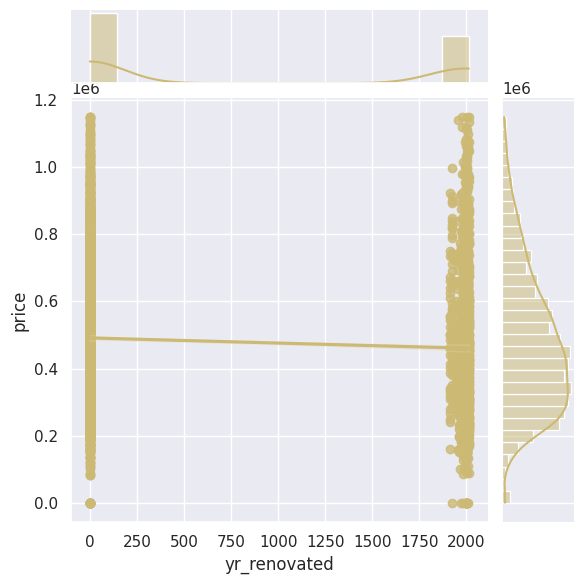

In [ ]:
sns.jointplot(x='yr_renovated',y='price',data=df,kind='reg',color='y')

15.street

In [ ]:
df['street'].value_counts()

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
769 N 74th St            2
11931 179th Pl NE        2
8430 8th Ave SW          2
                        ..
32119 199th Ave SE       1
1118 235th Pl NE         1
10804 SE 218th St        1
17018 124th Ave SE       1
18717 SE 258th St        1
Name: street, Length: 4122, dtype: int64

16.city

In [ ]:
df['city'].value_counts()

Seattle                1402
Renton                  285
Bellevue                226
Redmond                 221
Kent                    181
Issaquah                172
Kirkland                171
Auburn                  171
Sammamish               160
Federal Way             141
Shoreline               120
Woodinville             108
Maple Valley             96
Burien                   67
Snoqualmie               65
Kenmore                  65
Des Moines               58
Mercer Island            49
North Bend               49
Covington                42
Duvall                   41
Lake Forest Park         34
Bothell                  33
Newcastle                30
SeaTac                   29
Vashon                   29
Enumclaw                 27
Tukwila                  27
Carnation                18
Normandy Park            17
Black Diamond             9
Fall City                 9
Ravensdale                7
Pacific                   6
Clyde Hill                5
Algona              

<ipython-input-304-cae10736813f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='city',data=df,palette="pastel")


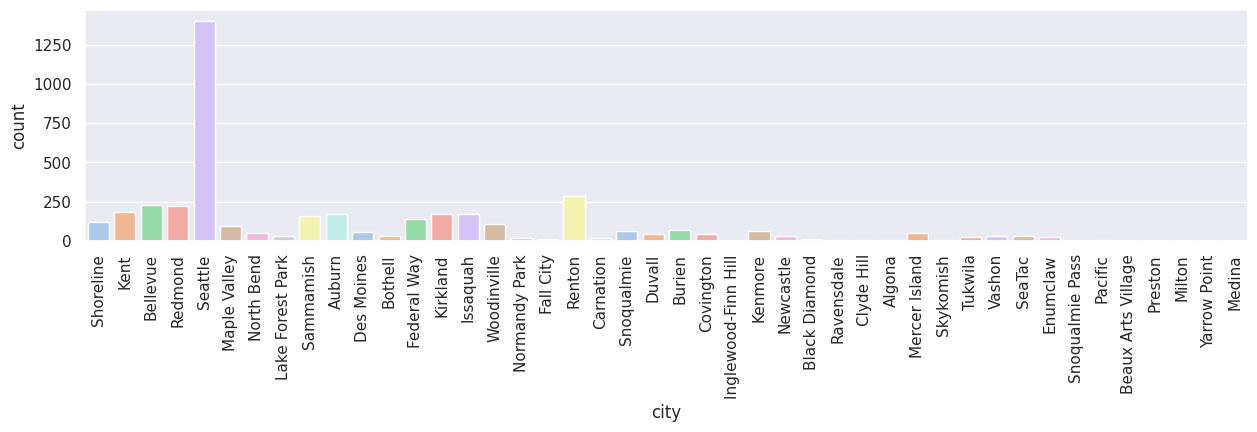

In [ ]:
plt.figure(figsize=(15,3))
sns.countplot(x='city',data=df,palette="pastel")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df1=pd.get_dummies(df[['city']],drop_first=True)
df1.head()

,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


17.statezip

In [ ]:
df['statezip'].value_counts()

WA 98103    137
WA 98052    130
WA 98117    126
WA 98115    123
WA 98059    101
           ... 
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
WA 98039      1
Name: statezip, Length: 77, dtype: int64

<ipython-input-307-1735727eb178>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='statezip',data=df,palette="pastel")


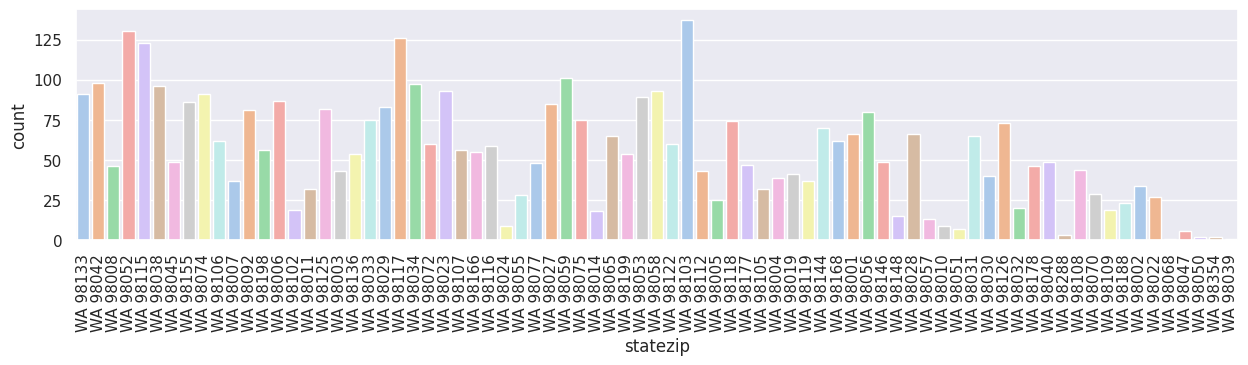

In [ ]:
plt.figure(figsize=(15,3))
sns.countplot(x='statezip',data=df,palette="pastel")
plt.xticks(rotation=90)
plt.show()

In [ ]:
pd.options.mode.copy_on_write=True
df['statezip']=df['statezip'].str.replace('WA ','')
df['statezip'].head()

0    98133
2    98042
3    98008
4    98052
5    98115
Name: statezip, dtype: object

In [ ]:
df['statezip']=df['statezip'].astype(int)
df['statezip'].head()

0    98133
2    98042
3    98008
4    98052
5    98115
Name: statezip, dtype: int64

18.country

In [ ]:
df['country'].value_counts()

USA    4188
Name: country, dtype: int64

drop unwanted columns

In [ ]:
df.drop(['date','sqft_above','waterfront','street','city','country'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,2.0,0,3,0,1955,2005,98133
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,0,1966,0,98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1963,0,98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,800,1976,1992,98052
5,490000.0,2.0,1.00,880,6380,1.0,0,3,0,1938,1994,98115


In [ ]:
data=pd.concat([df,df1],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,2.0,0,3,0,1955,...,0,0,1,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,0,1966,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1963,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,800,1976,...,0,0,0,0,0,0,0,0,0,0
5,490000.0,2.0,1.00,880,6380,1.0,0,3,0,1938,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
data.dtypes

price                       float64
bedrooms                    float64
bathrooms                   float64
sqft_living                   int64
sqft_lot                      int64
floors                      float64
view                          int64
condition                     int64
sqft_basement                 int64
yr_built                      int64
yr_renovated                  int64
statezip                      int64
city_Auburn                   uint8
city_Beaux Arts Village       uint8
city_Bellevue                 uint8
city_Black Diamond            uint8
city_Bothell                  uint8
city_Burien                   uint8
city_Carnation                uint8
city_Clyde Hill               uint8
city_Covington                uint8
city_Des Moines               uint8
city_Duvall                   uint8
city_Enumclaw                 uint8
city_Fall City                uint8
city_Federal Way              uint8
city_Inglewood-Finn Hill      uint8
city_Issaquah               

SEPARATING X AS INPUT AND Y AS OUPUT

In [ ]:
x=data.drop(['price'],axis=1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3.0,1.50,1340,7912,2.0,0,3,0,1955,2005,...,0,0,1,0,0,0,0,0,0,0
2,3.0,2.00,1930,11947,1.0,0,4,0,1966,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2.25,2000,8030,1.0,0,4,1000,1963,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,2.50,1940,10500,1.0,0,4,800,1976,1992,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1.00,880,6380,1.0,0,3,0,1938,1994,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y=data['price']
y.head()

0    313000.0
2    342000.0
3    420000.0
4    550000.0
5    490000.0
Name: price, dtype: float64

SPITTING DATA INTO TRAIN-TEST DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

MODEL CREATION

Linear Regression Model and its Performance Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
y_pred

array([462354.56265783, 711739.70063733, 746810.59524316, ...,
       345576.70377117, 522407.9574374 , 696607.0477391 ])

In [ ]:
table=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
table

,Actual Value,Predicted Value,Difference
2175,398000.0,462354.562658,-64354.562658
1353,732000.0,711739.700637,20260.299363
545,819900.0,746810.595243,73089.404757
2163,620000.0,651680.406766,-31680.406766
1159,361000.0,340307.122453,20692.877547
...,...,...,...
2996,800000.0,748687.840791,51312.159209
114,740000.0,582487.504655,157512.495345
747,350000.0,345576.703771,4423.296229
3663,480000.0,522407.957437,-42407.957437


In [ ]:
print("slope of Regression Line:",lr_model.coef_)
print("constant:",lr_model.intercept_)

slope of Regression Line: [-2.45654808e+04  3.72472873e+04  1.74183744e+02  6.49589000e-02
  1.17159871e+04  3.69720055e+04  1.78566983e+04 -6.06551295e+01
 -7.98717621e+02  7.15223296e-01 -7.55711042e+02  3.71981749e+04
  5.27917323e+05  3.38936406e+05  3.88873250e+04  1.67838069e+05
  2.18415271e+05  9.20232518e+04  2.56708194e+05  4.01034456e+04
  1.66693906e+05  1.01271135e+05 -2.29778297e+03  2.04212745e+05
  7.74610321e+03  2.19045054e+05  2.35597953e+05  1.81413250e+05
  3.98886720e+04  2.82192799e+05  2.68047799e+05  5.30799600e+04
 -2.61172924e+05  4.23936294e+05  3.97258144e+05  2.44223221e+05
  2.57416017e+05  1.26448374e+05  8.97364307e+04  1.65438727e+05
  1.45067821e+05  3.26588131e+05  1.12827741e+05  3.14041029e+05
  1.41573147e+05  3.37095263e+05  2.54169378e+05  1.92302105e+05
  1.66989212e+05 -2.57983629e-07  1.32506503e+05  1.53692703e+05
  2.49683872e+05  1.67900375e+05]
constant: 75519898.8492119


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

MAPE: 2.1215225295014113e+19
R2: 0.6453483360542926


Decision Tree Regression Model and its Performance Evaluation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
y_pred

array([458500., 445000., 861990., ..., 336900., 560000., 672500.])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

MAPE: 1.911253159284639e+19
R2: 0.46174973634461025


Random Forest Regression Model and its Performance Evaluation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
y_pred

array([458500., 445000., 861990., ..., 336900., 560000., 672500.])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

MAPE: 1.911253159284639e+19
R2: 0.46174973634461025
